<a href="https://colab.research.google.com/github/Chzacher/ENSYS5800-AI-Energy-zacher.c/blob/Project/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#####===> DO NOT CHANGE THIS CELL <===#####
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()                # Import the seaborn plotting package

###########################################

In [5]:
url = 'https://raw.githubusercontent.com/Chzacher/ENSYS5800-AI-Energy-zacher.c/main/oedi_data.csv'
df1 = pd.read_csv(url)
df1

,randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,snow_production_level,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurr_bin_ticket_minutes,hurr_affected_assets,hurr_production_level,HurricanePrep,HurricanePostInspection,hurricane,nearest_hurricane,wind_speed_mean,rain_value_mm,nearest_rain,storm_active_tickets,storm_bin_ticket_minutes,storm_affected_assets,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
0,C2S1,4/1/2018,West,T6,H4,large,19.0,No,None,None,Unknown,0.825922,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,354,4.48271875,0.0,9,No,None,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
1,C2S1,4/2/2018,West,T6,H4,large,19.0,No,None,None,Unknown,0.788456,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,354,6.481520833,0.0,10,No,None,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
2,C2S1,4/3/2018,West,T6,H4,large,19.0,No,None,None,Unknown,0.773524,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,354,5.166083333,0.0,11,No,None,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
3,C2S1,4/4/2018,West,T6,H4,large,19.0,No,None,None,Unknown,0.798637,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,354,3.5063125,0.0,12,No,None,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
4,C2S1,4/5/2018,West,T6,H4,large,19.0,No,None,None,Unknown,0.787212,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,354,5.429458333,0.0,13,No,None,None,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51499,C3S40,7/27/2019,Southeast,T5,H4,medium,31.0,No,None,None,Unknown,0.721850,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,284,1.197476748,0.0,3,No,None,None,Unknown,0,0.0,0,57,0.0,0,315,0.0
51500,C3S40,7/28/2019,Southeast,T5,H4,medium,31.0,No,None,None,Unknown,0.727255,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,285,0.766352175,0.0,4,No,None,None,Unknown,0,0.0,0,58,0.0,0,316,0.0
51501,C3S40,7/29/2019,Southeast,T5,H4,medium,31.0,No,None,None,Unknown,0.717232,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,286,1.126704344,0.0,5,No,None,None,Unknown,0,0.0,0,59,0.0,0,317,0.0
51502,C3S40,7/30/2019,Southeast,T5,H4,medium,31.0,No,None,None,Unknown,0.702711,0.0,0.0,0,0.0,None,None,Unknown,No,No,0.0,287,1.262544211,0.0,6,No,None,None,Unknown,0,0.0,0,60,0.0,0,318,0.0


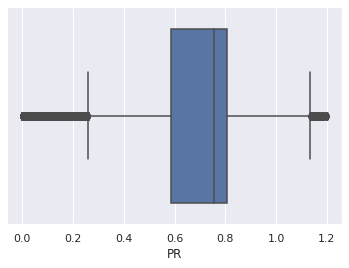

In [7]:
sns.boxplot(x=df1['PR'])                              

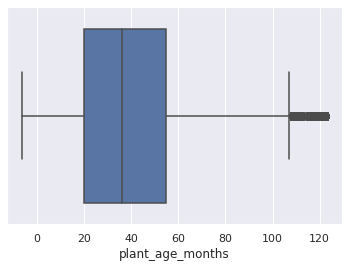

In [8]:
sns.boxplot(x=df1['plant_age_months'])

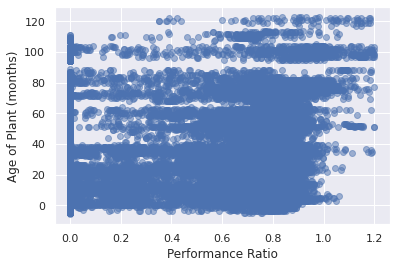

In [10]:
plt.scatter(df1['PR'], df1['plant_age_months'], alpha=0.5)
plt.xlabel('Performance Ratio')
plt.ylabel('Age of Plant (months)')
plt.show()

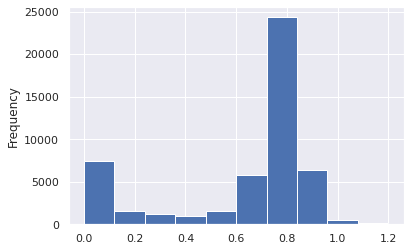

In [11]:
df1['PR'].plot(kind="hist")

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51504 entries, 0 to 51503
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   randid                    51504 non-null  object 
 1   Date                      51504 non-null  object 
 2   NOAAClimRegion            51504 non-null  object 
 3   TempZone                  51504 non-null  object 
 4   HumidZone                 51504 non-null  object 
 5   bin_PlantSize_kW          51504 non-null  object 
 6   plant_age_months          51356 non-null  float64
 7   active_snow_tickets       51504 non-null  object 
 8   snow_bin_ticket_minutes   51504 non-null  object 
 9   snow_affected_assets      51504 non-null  object 
 10  snow_production_level     51437 non-null  object 
 11  PR                        49940 non-null  float64
 12  snow_value_mm             45682 non-null  float64
 13  total_daily_snow_mm       45327 non-null  float64
 14  low_ir

In [21]:
df1=df1.dropna()


In [22]:
df1.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33738 entries, 0 to 51503
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   randid                    33738 non-null  object 
 1   Date                      33738 non-null  object 
 2   NOAAClimRegion            33738 non-null  object 
 3   TempZone                  33738 non-null  object 
 4   HumidZone                 33738 non-null  object 
 5   bin_PlantSize_kW          33738 non-null  object 
 6   plant_age_months          33738 non-null  float64
 7   active_snow_tickets       33738 non-null  object 
 8   snow_bin_ticket_minutes   33738 non-null  object 
 9   snow_affected_assets      33738 non-null  object 
 10  snow_production_level     33738 non-null  object 
 11  PR                        33738 non-null  float64
 12  snow_value_mm             33738 non-null  float64
 13  total_daily_snow_mm       33738 non-null  float64
 14  low_ir

In [25]:
df1.describe(
)

,plant_age_months,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,rain_value_mm,nearest_rain,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.00000,33738.000000,33738.000000,33738.000000,33738.000000,33738.00000
mean,44.591499,0.679559,0.590467,1.490023,0.234780,99.023436,0.008507,320.042593,2.185277,17.208163,0.000119,0.004327,0.51479,1419.180835,0.001215,0.213557,1542.179738,0.26276
std,22.024962,0.255210,7.125497,12.210168,0.423867,394.980113,0.091840,87.817508,8.280302,30.005765,0.010888,0.065642,22.06232,1069.611552,0.034840,7.071819,889.577994,0.44014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,29.000000,0.701644,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,0.000000,0.000000,0.000000,0.000000,0.00000,175.000000,0.000000,0.000000,629.000000,0.00000
50%,45.000000,0.761219,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,0.000000,4.000000,0.000000,0.000000,0.00000,2420.000000,0.000000,0.000000,2255.000000,0.00000
75%,57.000000,0.810292,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,0.030112,20.000000,0.000000,0.000000,0.00000,2420.000000,0.000000,0.000000,2255.000000,1.00000
max,123.000000,1.199583,263.616900,284.713242,1.000000,3614.551523,1.000000,354.000000,278.525241,169.000000,1.000000,1.000000,1440.00000,2420.000000,1.000000,496.000000,2255.000000,1.00000


## **CLUSTERING**

# KMEANS

In [63]:
from sklearn.cluster import KMeans
x = df1[['snow_value_mm', 'rain_value_mm',]]
y = df1['PR']
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 ... 0 0 0]


array([[1.38658550e-01, 7.57895790e-01],
       [1.70846511e+02, 1.81272175e+01],
       [2.12607785e-01, 2.60684547e+01],
       [5.66343767e+01, 8.73305838e+00],
       [3.33066907e-16, 1.57826153e+02]])

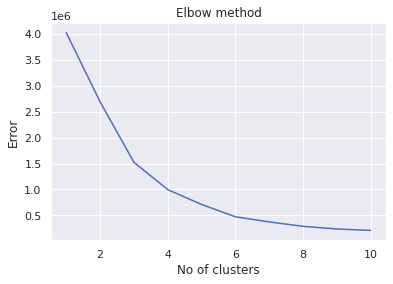

In [64]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [65]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 ... 0 0 0]


array([[  0.24281286,   0.9767581 ],
       [  0.43590352,  33.71950358],
       [108.70376619,  14.02852999]])

Text(0, 0.5, 'PR')

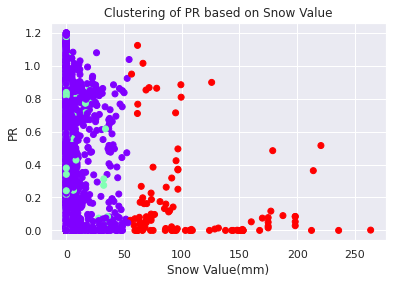

In [66]:
plt.scatter(x['snow_value_mm'], y, c=y_kmeans3, cmap='rainbow')
plt.title('Clustering of PR based on Snow Value')
plt.xlabel('Snow Value(mm)')
plt.ylabel('PR')

Text(0, 0.5, 'PR')

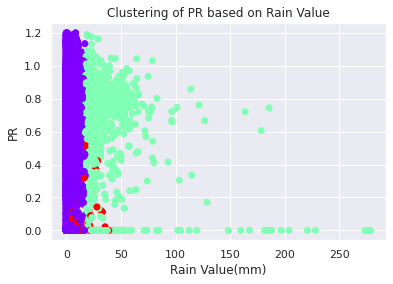

In [67]:
plt.scatter(x['rain_value_mm'], y, c=y_kmeans3, cmap='rainbow')
plt.title('Clustering of PR based on Rain Value')
plt.xlabel('Rain Value(mm)')
plt.ylabel('PR')

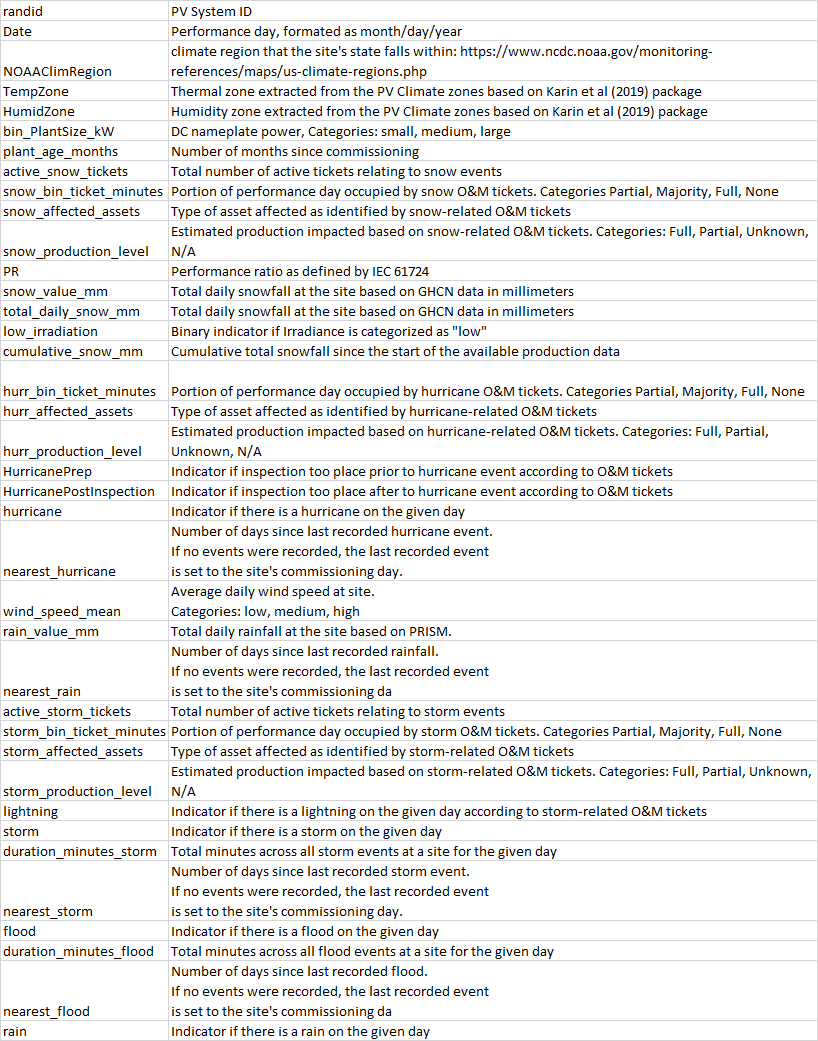